In [2]:
import pandas as pd

# write simple query
query = "https://data.cityofnewyork.us/resource/ic3t-wcy2.json?"\
"$select=pre__filing_date,borough"\
"&$limit=1000000"

# read in 1 mm rows
d = pd.read_json(query)

In [3]:
# tranform date
d['date'] = pd.to_datetime(d['pre__filing_date'])

# group by dates, count values
df = d['date'].dt.date.value_counts().sort_index().reset_index()

# rename columns
df.columns = ['date', 'counts']


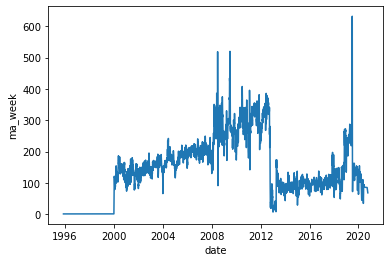

In [4]:
import seaborn as sns

# create 7 day ma
df['ma_week'] = df.rolling(7).mean()

# make ts plot
sns.lineplot(data = df, x = "date", y = "ma_week")

# Next Steps

- Restrict > 2016
- make plot presentable
- learn about [mansion tax](https://ny.curbed.com/2019/7/1/20677076/mansion-tax-q2-sales-manhattan-2019)